In [1]:
import pandas as pd 
df=pd.read_csv("/kaggle/input/germany-used-cars-dataset-2023/data.csv")

In [2]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


# Preprocessing

In [4]:
df.shape

(251079, 14)

In [5]:
df.isna().sum()

brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

#### Drop null values

In [6]:
df.dtypes

brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object

In [7]:
df.dropna()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251071,volvo,Volvo XC60,silver,04/2023,2023,81350,228,310,Automatic,Hybrid,"7,4 l/100 km",167 g/km,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
251072,volvo,Volvo XC60,silver,05/2023,2023,55400,145,197,Automatic,Diesel,"5,6 l/100 km",142 g/km,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
251073,volvo,Volvo XC60,silver,03/2023,2023,54500,145,197,Automatic,Diesel,"5,6 l/100 km",142 g/km,5900.0,B4 Autom. Plus Dark Sitzhzg.
251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'volkswagen'),
  Text(1, 0, 'mercedes-benz'),
  Text(2, 0, 'audi'),
  Text(3, 0, 'opel'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'ford'),
  Text(6, 0, 'skoda'),
  Text(7, 0, 'seat'),
  Text(8, 0, 'renault'),
  Text(9, 0, 'toyota'),
  Text(10, 0, 'hyundai'),
  Text(11, 0, 'peugeot'),
  Text(12, 0, 'kia'),
  Text(13, 0, 'fiat'),
  Text(14, 0, 'mini'),
  Text(15, 0, 'mazda'),
  Text(16, 0, 'volvo'),
  Text(17, 0, 'citroen'),
  Text(18, 0, 'porsche'),
  Text(19, 0, 'nissan'),
  Text(20, 0, 'dacia'),
  Text(21, 0, 'land-rover'),
  Text(22, 0, 'jeep'),
  Text(23, 0, 'smart'),
  Text(24, 0, 'alfa-romeo'),
  Text(25, 0, 'jaguar'),
  Text(26, 0, 'mitsubishi'),
  Text(27, 0, 'honda'),
  Text(28, 0, 'maserati'),
  Text(29, 0, 'dodge'),
  Text(30, 0, 'ferrari'),
  Text(31, 0, 'be

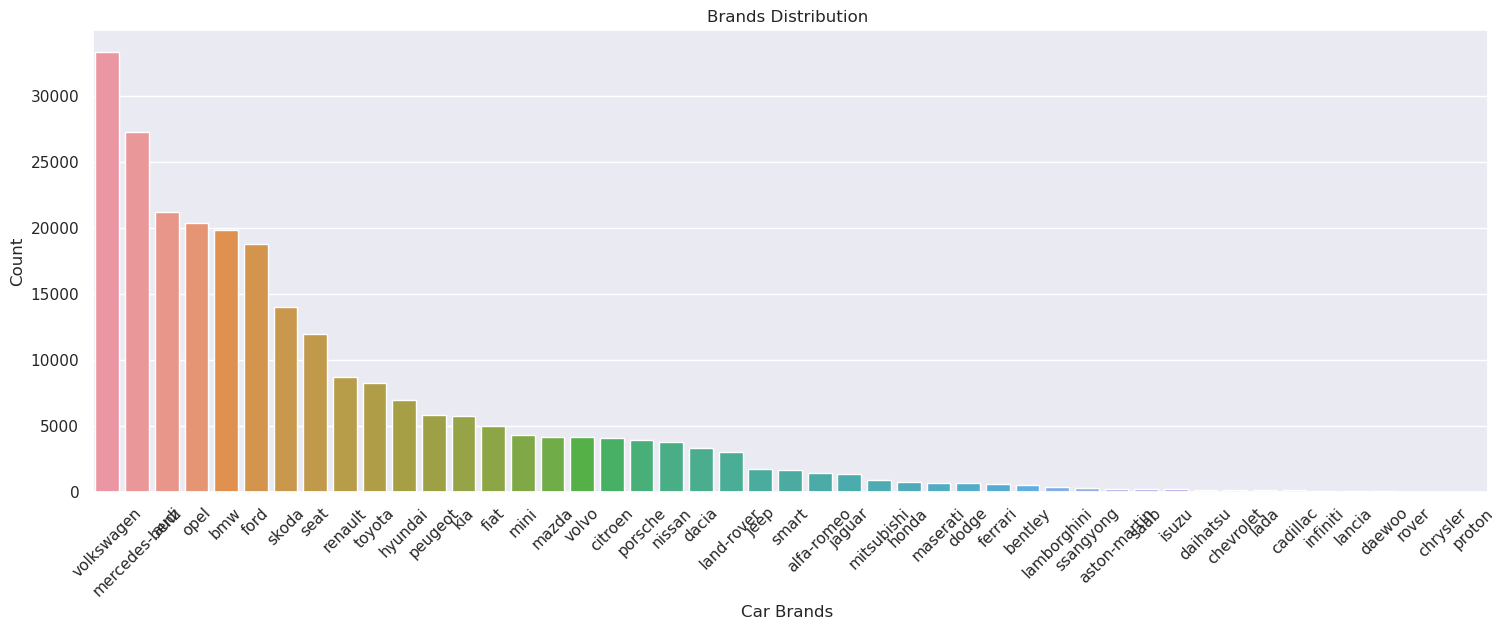

In [9]:
# Assuming you have a pandas DataFrame called 'df' and the column name is 'category'
sns.set(style="darkgrid")  # Set the style of the plot

# Count the occurrences of each category
category_counts = df['brand'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(18, 6))  # Set the figure size
ax = sns.barplot(x=category_counts.index, y=category_counts.values, ax=None)

# Customize the plot
plt.title('Brands Distribution ')
plt.xlabel('Car Brands ')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed


So Volkswagen , mercedes and opel are have most instances 

In [10]:
df.head(2)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"


In [11]:
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')
df.dropna(subset=['price_in_euro'], inplace=True)

In [12]:
top_20_highest = df.nlargest(20, 'price_in_euro')
top_20_highest['price_in_euro']=top_20_highest['price_in_euro']/ 100000

In [13]:
top_20_highest

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
93699,lamborghini,Lamborghini,grey,08/2018,2018,58.90500,566,770,Automatic,Petrol,16 l/100 km,370 g/km,65.0,CENTENARIO ROADSTER LP770-4 |1 OF 20 |NO MILEAGE
93840,lamborghini,Lamborghini,black,11/2021,2021,32.50000,602,818,Automatic,Hybrid,"14,8 l/100 km",373 g/km,177.0,Sian
106583,mercedes-benz,Mercedes-Benz SLR,grey,01/2007,2007,24.90000,478,650,Automatic,Petrol,"14,5 l/100 km",348 g/km,15793.0,722 MSO McLaren Edition 1 of 25 worldwide Nr.12
1509,aston-martin,Aston Martin,brown,08/2011,2011,22.89000,559,760,Automatic,Petrol,NaN,- (g/km),8900.0,One-77 I Bang Olufsen I Carbon I Q-Ausstattung
165445,porsche,Porsche 918,white,06/2014,2014,19.90000,652,886,Automatic,Hybrid,"3,1 l/100 km",72 g/km,5125.0,Spyder WEISSACH PAKET MAGNESIUM FELGEN
164621,porsche,Porsche Carrera GT,black,04/2006,2006,15.80000,450,612,Manual,Petrol,NaN,- (g/km),13460.0,CARRERA GT | NR. 1234 | UNIQUE COLOR COMBO
164598,porsche,Porsche Carrera GT,black,04/2005,2005,15.49000,450,612,Manual,Petrol,NaN,- (g/km),26800.0,1.Hd Deutsches Fahrzeug !! Mwst awb!!
165783,porsche,Porsche 991,white,01/2015,2015,13.50000,316,430,Automatic,Petrol,"8,9 l/100 km",207 g/km,27000.0,Carrera GTS Cabrio nur 27.000km Komfortpaket
52260,ferrari,Ferrari F12,yellow,04/2017,2017,12.90000,570,775,Automatic,Petrol,NaN,- (g/km),10800.0,*TDF 1of799*Ferrari-Dresden*
165263,porsche,Porsche 918,grey,07/2014,2014,12.90000,652,886,Automatic,Hybrid,- (l/100 km),0 g/km,31490.0,Spyder | Weissach-Package | service new


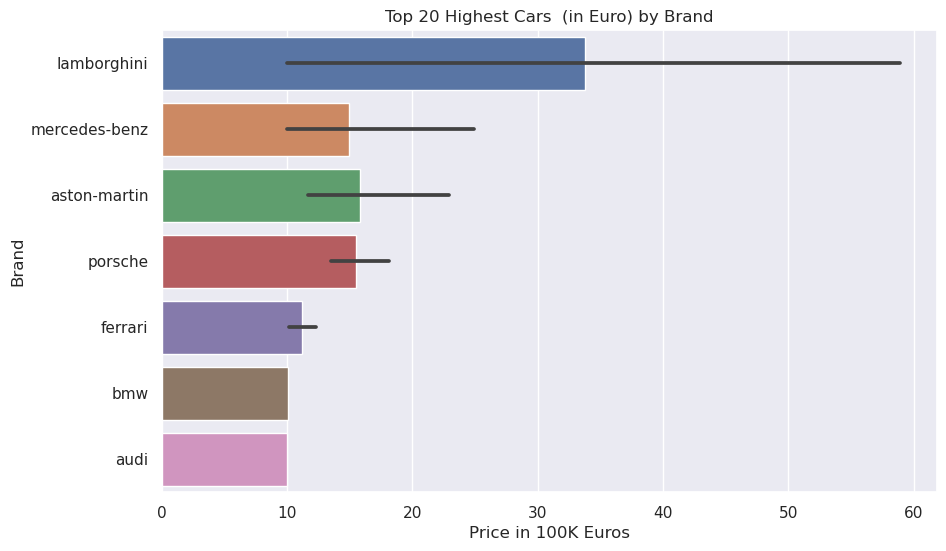

In [14]:
sns.set(style="darkgrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the barplot
sns.barplot(x='price_in_euro', y='brand', data=top_20_highest)

# Customize the plot
plt.title('Top 20 Highest Cars  (in Euro) by Brand')
plt.xlabel('Price in 100K Euros')
plt.ylabel('Brand')

# Show the plot
plt.show()

### As expected Lamborgini is the most expensive 

### Let's check fuel types 

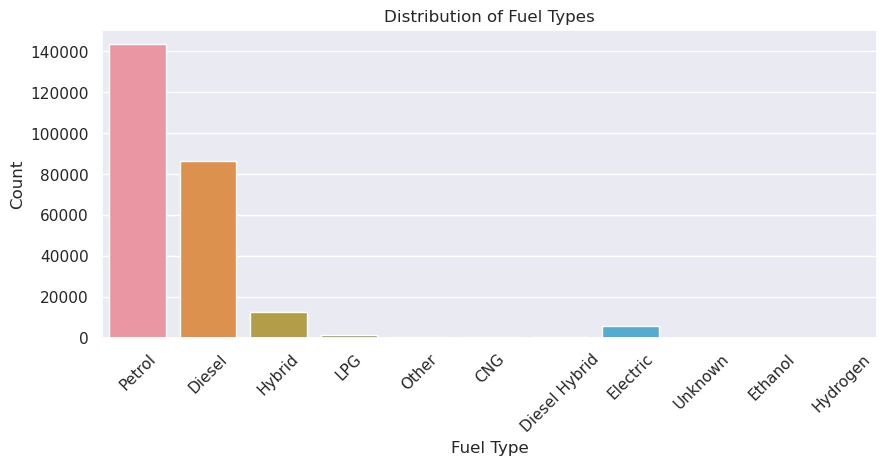

In [15]:
sns.set(style="darkgrid")  # Set the style of the plot

plt.figure(figsize=(10, 4))  # Set the figure size

# Plot the count plot
sns.countplot(x='fuel_type', data=df)

# Customize the plot
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
# Show the plot
plt.show()

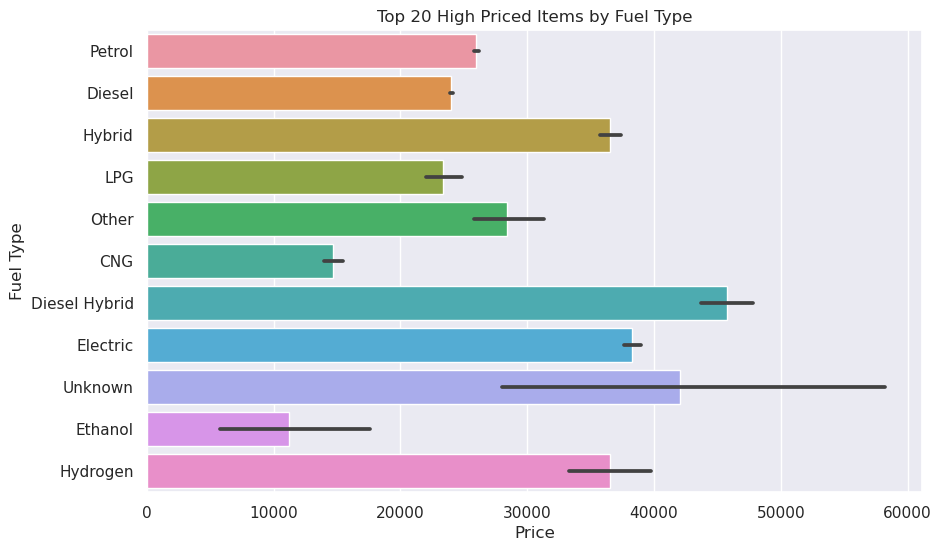

In [16]:

sns.set(style="darkgrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the barplot
ax = sns.barplot(x='price_in_euro', y='fuel_type', data=df)

# Customize the plot
plt.title('Top 20 High Priced Items by Fuel Type')
plt.xlabel('Price')
plt.ylabel('Fuel Type')

# Show the plot
plt.show()

### So Diesel Engine based hybrid cars are most expensive

In [17]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


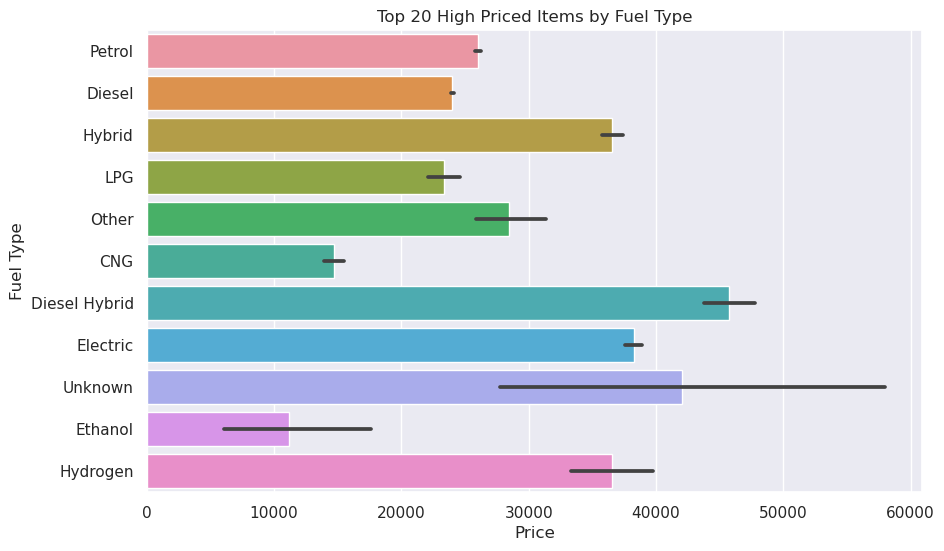

In [18]:

sns.set(style="darkgrid")  # Set the style of the plot

plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the barplot
ax = sns.barplot(x='price_in_euro', y='fuel_type', data=df)

# Customize the plot
plt.title('Top 20 High Priced Items by Fuel Type')
plt.xlabel('Price')
plt.ylabel('Fuel Type')

# Show the plot
plt.show()